In [2]:
import fastai
from fastai.text.all import *
import os
from PIL import Image
from pathlib import Path
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle
from collections import Counter
from seaborn import barplot
import shutil

In [3]:
PIXEL_BLOCKS_PATH = Path('/home/ibukey/ttmp/blocks-txt-v3/')

In [4]:
whitespace_tokenizer = BaseTokenizer()

In [5]:
data_loader = TextDataLoaders.from_folder(
    path=PIXEL_BLOCKS_PATH, 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=whitespace_tokenizer)

Rules: []


In [6]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(PIXEL_BLOCKS_PATH), 
    pretrained=True,
    wd=0.1).to_fp16()

In [7]:
learn.load('pixel-blocks-extra-margin')

In [8]:
def block_to_image(tokens):
    block_lst = []
    for row in tokens:
        row = np.array([0 if int(char)==0 else 1 for char in row])
        block = row.reshape((15,15))
        block_lst.append(block)

    # create vertical patches
    vert_block = []
    for i in range(len(block_lst)//6):
        first = np.vstack((block_lst[(i*6)], block_lst[(i*6)+1]))
        second =  np.vstack((first, block_lst[(i*6)+2]))
        third = np.vstack((second, block_lst[(i*6)+3]))
        fourth =  np.vstack((third, block_lst[(i*6)+4]))
        final =  np.vstack((fourth, block_lst[(i*6)+5]))
        vert_block.append(final)

    # stack horizontally
    curr = np.array([], dtype=np.uint8)
    for i in range(len(vert_block)):
        if i == 0:
            curr = vert_block[0]
        else:
            curr = np.hstack((curr, vert_block[i]))

    staff = np.full((3, curr.shape[1]), 0)
    lst = [curr[i*15:(i+1)*15] for i in range(7)]
    img = np.empty((0, curr.shape[1]))

    for i in range(6):
        if i > 0:
            add = np.vstack((staff,lst[i]))
        else:
            staff_empty = np.full((3, curr.shape[1]), 1)
            add = np.vstack((staff_empty,lst[i]))
        img = np.vstack((img,add))
#     img = np.vstack((img,staff))

    im = Image.fromarray((img * 255).astype(np.uint8))
    return im

In [26]:
with open(PIXEL_BLOCKS_PATH/'201008534-1_23_2.txt') as f:
    t = f.read()
t

'111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111110111111111111100111111111111000111111111111000111111111110000111111111110000111111111110000111111111100000111111111100000111111111100000111111111100000111111111110000 111111111111110111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 11111111110000011111111111111111111111111111111111111111111111111111111111111111111111111111111

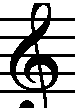

In [20]:
g_clef = "111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110111111111111110111111111111100 111111111110000111111111110000111111111110000111111111110000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000111111111100000 111111111110000111111111111000111111111111000111111111111100111111111111100111111111111110111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110 111111111000000111111110000000111111100000000111111000000000111110000000000111100000000000111100000000000111000000000000110000000000000100000000000001100000000000011000000000000111000000000001111000000000011111000000000111111 000000111111111000001111111111000011111111110000011111111100000111111111000000111111111000001111111110000001111111100000001111111100000011111111100000011111111100000011111111000000011111111000000011111111000000011111111000000 011111111100000001111111110000001111111110000001111111111000000111111111100000011111111110000011111111111000001111111111100000111111111110000001111111111000000111111111110000001111111111000000001111111110000000111111111110000 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100001111111110000000111111100000000111111000000000111110000000000111110000000000111110000000000111100000000000 111100000000000111100000000000111000000000111111000000001111111000000111111110000000111111110000001111111110000011111111110000011111111100000111111111100000111111111100000111111111100001111111111100001111111111100001111111111 100011111111110100011111111100100011111111100100011111111000100011111110000100011111100000100001111000000100001110000000110001100000000110000000000000110000000000000110000000000000100000000000000000000000000001000000000000011 000000000011111000000000111111000000001111111000000011111111000000011111111000000001111111000110001111111011110001111111111110001111111111110001111111111110001111111111110000111111111110000111111111111000111111111111000111111 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110001111000011110001111001111110001111011111110000111011111110000111111111111000111111111111000111 111111111000011111111111100011111111111100011011111111100011001111111100011000111111100001000001111100001110000111110001111111111110001111111111110001111111111110000111111111110000111111111110000000000000000000000000000000000 111111111111100111111111111100111111111111100111111111111100111111111111100111111111111100111111111111110111111111111110011111111111110001111111111110000111111111110000011111111110000011111111110000011111111110000011111111110 000001111111111000001111111111000001111111111110001111111111110000111111111111000111111111111000111111111111000111111111111000111111111111000111111111111000111111111111000111111111110000111111111110000111111111110000111111111 000001111111111000001111111111000001111111111000001111111111000011111111111000011111111111000111111111111000111111111111001111111111111001111111111111011111111111111011111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 000000111111111000000011111111000000001111111000000000111111000000000011111000000000001111000000000001111000000000000111000000000000111110000000000011111000000000011111100000000011111110000000011111111000000011111111000000011 111111100000011111111100000011111111100000011111111100000111111111100000111111111000000111111111000001111111110000011111111100000011111111100000111111110000001111111000000011111111000001111111111000111111111111011111111111111 011111111111111011111111111111011111111111111011111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111001111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111"
tokens = g_clef.split()
block_to_image(tokens)

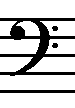

In [35]:
f_clef = "111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111110111111111111100111111111111000111111111111000111111111110000111111111110000111111111110000111111111100000111111111100000111111111100000111111111100000111111111110000 111111111111110111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111100000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 110000001111111100001111111111000111111111111001111111111111011111111111111000000111111111000000011111111000000001111111000000000111111000000000011111000000000011111000000000011111000000000011111000000000011111000000000011111 000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110111111111111100111111111111000111111111100000111111111000000111111110000000111111000000000111110000000001111000000000111100000000001111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 100000000011111111000000000111111110000000011111111000000001111111100000000111111110000000111111110000000111111111000000111111111000000111111111000000111111111100000111111111100000111111111100000111111111100000111111111100000 111111111100000111111111100000111111111100000111111111100000111111111000000111111111000000111111111000000111111111000000111111110000000111111110000000111111110000000111111100000000111111100000000111111000000000111111000000000 111000000000011110000000000111100000000001111100000000011111000000000111111000000001111111000000011111111000000111111111000001111111111000011111111111001111111111111011111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111011111110000111001111100000011001111100000011000111110000011000111110000111000011111111111000011111111111000011111111111000011111111111000001111111111 000001111111111000011111111111000011111111111000011111111111000011110000111000011110000011000011100000011000111100000011000111110000111000111111111111001111111111111001111111111111011111111111111011111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111"
tokens = f_clef.split()
block_to_image(tokens)

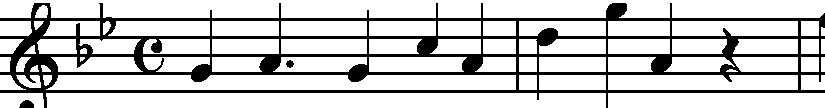

In [33]:
block_to_image(learn.predict(g_clef, 300, temperature=.8, no_unk=True).split())

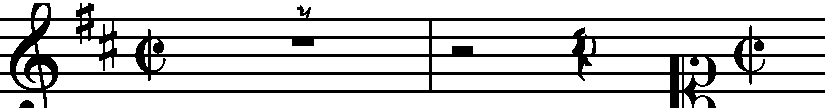

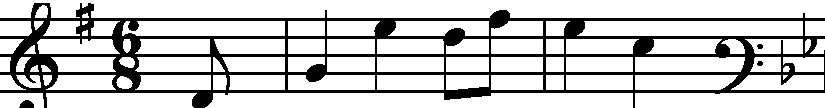

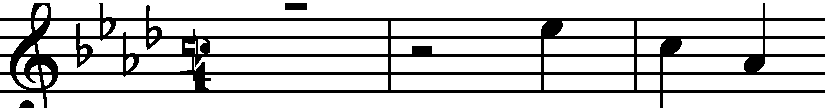

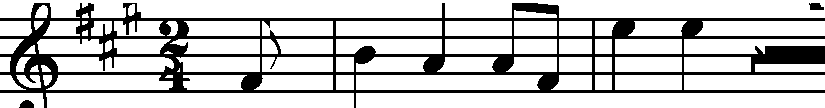

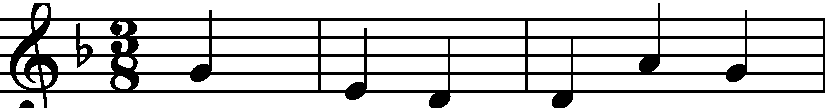

In [34]:
for i in range(5):
    block_to_image(learn.predict(g_clef, 300, temperature=.8, no_unk=True).split()).show()

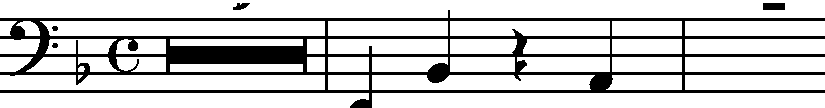

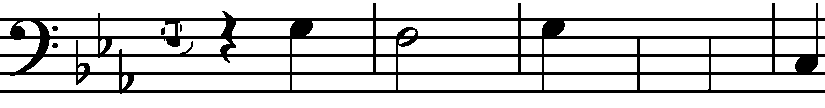

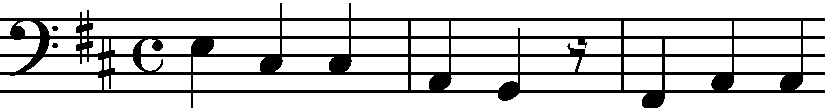

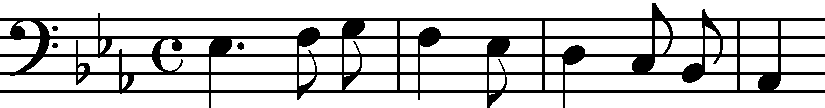

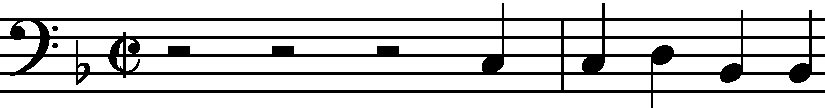

In [ ]:
for i in range(7):
    block_to_image(learn.predict(f_clef, 300, temperature=.8, no_unk=True).split()).show()

In [15]:
for i in range(7):
    im = block_to_image(learn.predict(g_clef, 300, temperature=.8, no_unk=True).split())
    im.save('/home/ibukey/ttmp/pixel-blocks-preds/g_{}.png'.format(i))

In [16]:
for i in range(7):
    im = block_to_image(learn.predict(c_clef, 300, temperature=.8, no_unk=True).split())
    im.save('/home/ibukey/ttmp/pixel-blocks-preds/c_{}.png'.format(i))

In [27]:
Image.open('/home/ibukey/ttmp/pixel-blocks-preds/c_7.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ibukey/ttmp/pixel-blocks-preds/c_7.png'